In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [176]:
df = pd.read_csv("Churn_Modelling.csv", index_col="CustomerId")
df = df.drop("RowNumber", axis=1)
df.head(10)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [177]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [178]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [179]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

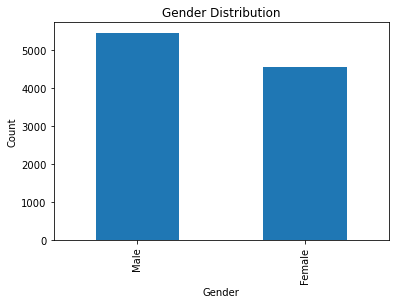

In [180]:
gender_counts = df.Gender.value_counts()
gender_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

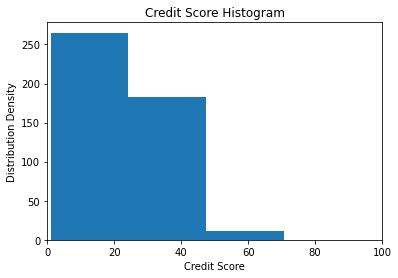

In [181]:
credit_score = df.CreditScore.value_counts()
credit_score.plot(kind="hist")
plt.xlabel('Credit Score')
plt.ylabel('Distribution Density')
plt.title('Credit Score Histogram')
plt.xlim(0, 100)
plt.show()

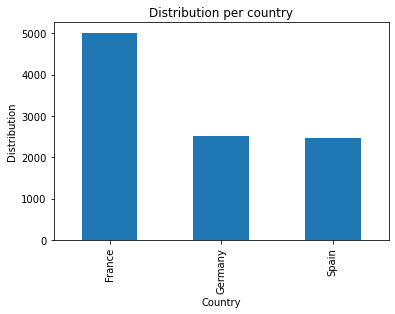

In [182]:
countries = df.Geography.value_counts()
countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Distribution')
plt.title('Distribution per country')
plt.show()

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns

<AxesSubplot:xlabel='Exited', ylabel='count'>

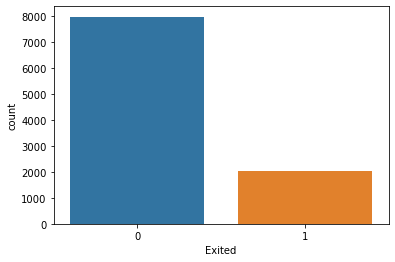

In [184]:
sns.countplot(x=df.Exited)

In [185]:
df = df[["CreditScore", "Age", "Gender", "Geography", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]]
# geography
# gender

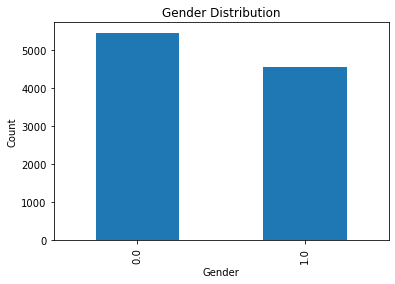

In [186]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
df.Gender = ohe.fit_transform(df[["Gender"]])
# df.head(10)
gender_counts = df.Gender.value_counts()
gender_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [187]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [188]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df.head(20)

,CreditScore,Age,Gender,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,42,1.0,0,2,0.00,1,1,1,101348.88,1
15647311,608,41,1.0,2,1,83807.86,1,0,1,112542.58,0
15619304,502,42,1.0,0,8,159660.80,3,1,0,113931.57,1
15701354,699,39,1.0,0,1,0.00,2,0,0,93826.63,0
15737888,850,43,1.0,2,2,125510.82,1,1,1,79084.10,0
15574012,645,44,0.0,2,8,113755.78,2,1,0,149756.71,1
15592531,822,50,0.0,0,7,0.00,2,1,1,10062.80,0
15656148,376,29,1.0,1,4,115046.74,4,1,0,119346.88,1
15792365,501,44,0.0,0,4,142051.07,2,0,1,74940.50,0


In [189]:
df.Geography.value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [190]:
credit_score_exited = df.CreditScore.corr(df.Exited) #-0.0271
age_exited = df.Age.corr(df.Exited) #0.285
tenure_exited = df.Tenure.corr(df.Exited) #0.014
balance_exited = df.Balance.corr(df.Exited) #0.1185
numofproducts_exited = df.NumOfProducts.corr(df.Exited) #-0.4781
hascredcard_exited = df.HasCrCard.corr(df.Exited) #0.00714
isactive_exited = df.IsActiveMember.corr(df.Exited) #-0.15613
salary_exited = df.EstimatedSalary.corr(df.Exited) #0.121
gender_exited = df.Gender.corr(df.Exited) #0.012096
print(salary_exited)

0.012096861026844645


In [191]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [193]:
df.head()

,CreditScore,Age,Gender,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,42,1.0,0,2,0.00,1,1,1,101348.88,1
15647311,608,41,1.0,2,1,83807.86,1,0,1,112542.58,0
15619304,502,42,1.0,0,8,159660.80,3,1,0,113931.57,1
15701354,699,39,1.0,0,1,0.00,2,0,0,93826.63,0
15737888,850,43,1.0,2,2,125510.82,1,1,1,79084.10,0


In [194]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [195]:
X_train[:10]

array([[ 0.35649971, -0.6557859 , -0.91324755, -0.9055496 ,  0.34567966,
        -1.21847056,  0.80843615,  0.64920267,  0.97481699,  1.36766974],
       [-0.20389777,  0.29493847, -0.91324755,  0.30164867, -0.3483691 ,
         0.69683765,  0.80843615,  0.64920267,  0.97481699,  1.6612541 ],
       [-0.96147213, -1.41636539, -0.91324755,  1.50884694, -0.69539349,
         0.61862909, -0.91668767,  0.64920267, -1.02583358, -0.25280688],
       [-0.94071667, -1.13114808,  1.09499335, -0.9055496 ,  1.38675281,
         0.95321202, -0.91668767,  0.64920267, -1.02583358,  0.91539272],
       [-1.39733684,  1.62595257, -0.91324755, -0.9055496 ,  1.38675281,
         1.05744869, -0.91668767, -1.54035103, -1.02583358, -1.05960019],
       [-0.85769482,  0.19986603, -0.91324755, -0.9055496 , -0.3483691 ,
         0.7067467 , -0.91668767,  0.64920267, -1.02583358,  1.09047006],
       [ 0.32536652,  0.10479359,  1.09499335, -0.9055496 , -1.38944225,
        -1.21847056,  0.80843615, -1.54035103

## Random Forest Classifier

In [196]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [197]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.45      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.87      0.85      2000



In [198]:
print(confusion_matrix(y_test, pred_rfc))

[[1554   53]
 [ 216  177]]


## SVM

In [199]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [200]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.81      0.36      0.50       393

    accuracy                           0.86      2000
   macro avg       0.84      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000



In [201]:
print(confusion_matrix(y_test, pred_clf))

[[1573   34]
 [ 250  143]]


## Neural Network

In [202]:
from sklearn.neural_network import MLPClassifier

# Multi Layer Perceptron
nlpc = MLPClassifier(hidden_layer_sizes=(10, 15, 5), max_iter=250)
nlpc.fit(X_train, y_train)
pred_nlpc = nlpc.predict(X_test)

/home/gachuki/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


In [203]:
print(classification_report(y_test, pred_nlpc))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [204]:
print(confusion_matrix(y_test, pred_clf))

[[1573   34]
 [ 250  143]]


## Logistic Regression

In [205]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [206]:
log_regression = model.predict(X_test)

In [207]:
print(classification_report(y_test, log_regression))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



In [208]:
print(confusion_matrix(y_test, log_regression))

[[1559   48]
 [ 321   72]]


## Decision Trees

In [209]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [210]:
decision_tree = model.predict(X_test)

In [211]:
print(classification_report(y_test, decision_tree))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1607
           1       0.45      0.52      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000



In [212]:
print(confusion_matrix(y_test, decision_tree))

[[1355  252]
 [ 189  204]]


## Gradient Boosting

In [213]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [214]:
grad_boosting = model.predict(X_test)

In [215]:
print(classification_report(y_test, grad_boosting))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [216]:
print(confusion_matrix(y_test, grad_boosting))

[[1548   59]
 [ 208  185]]


## K-Nearest Neighbours

In [217]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [218]:
knn = model.predict(X_test)

/home/gachuki/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [219]:
print(classification_report(y_test, knn))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.73      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000



In [220]:
print(confusion_matrix(y_test, knn))

[[1514   93]
 [ 248  145]]
